In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

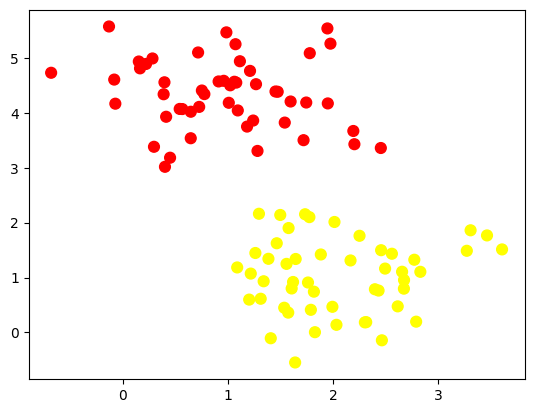

In [6]:
#Generating binary classification data:
from sklearn.datasets._samples_generator import make_blobs
x,y = make_blobs(n_samples=100,centers=2,random_state=0,cluster_std=0.65)
plt.scatter(x[:,0],x[:,1],c=y,s=60,cmap='autumn');

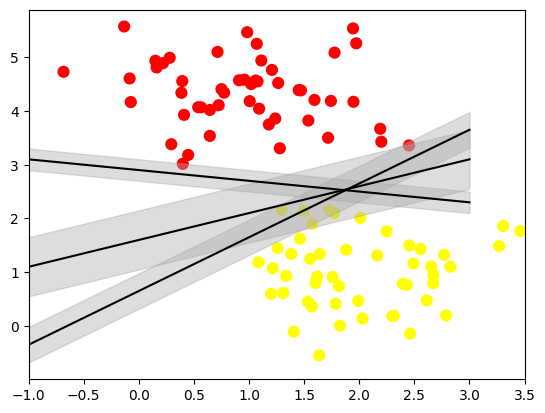

In [8]:
#margin

xfit =np.linspace(-1,3,5)
plt.scatter(x[:,0],x[:,1],c=y,s=60,cmap='autumn');

for m,b,d in [(1,0.65,0.33),(0.5,1.6,0.55),(-0.2,2.9,0.2)]:
  yfit=m*xfit+b
  plt.plot(xfit,yfit,'-k')
  plt.fill_between(xfit, yfit-d,yfit+d,edgecolor='none',color='#AAAAAA',alpha=0.4)

plt.xlim(-1,3.5);


In [10]:
#build a SVM-c model to classify data:

from sklearn.svm import SVC #support vector classifier
model = SVC(kernel='linear',C=10000000)
model.fit(x,y)

SVC(C=10000000, kernel='linear')

In [17]:
        #plotting
def plot_svc_decision_function(model,ax=None,plot_support=True):
          if ax is None:
               ax=plt.gca()
          xlim = ax.getxlim()
          ylim = ax.get_ylim()

          x = np.linspace(xlim[0],xlim[1],30)
          y = np.linspace(ylim[0],ylim[1],30)
          Y,X = np.meshgrid(y,x)
          xy = np.vstack([X.ravel(),Y.ravel()]).T
          p=model.decision_function(xy).reshape(X.shape)

          ax.contour(X,Y ,p,colors='k',levels=[-1,0,1],alpha=0.5,linestyles=['--','-','--'])

          if plot_support:
            ax.scatter(model.support_vectors_[:,0],
                       model.support_vectors_[:,1],
                       s=300,linewidth=1,facecolors='none');

          ax.set_xlim(xlim)
          ax.set_ylim(ylim)



In [21]:
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')
plot_svc_decision_function(model)

NameError: name 'X' is not defined

In [15]:
model.support_vectors_

array([[0.39920934, 3.01626962],
       [2.45161058, 3.35844964],
       [1.29273731, 2.16101743]])